In [1]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
%matplotlib inline
#%matplotlib

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [81]:
def reducir(img, nivel=2):
    img_nivel = img.copy()
    for n in range(nivel):
        img_nivel = cv.pyrDown(img_nivel)
        #print('\nTamaño imagen: {} pix'.format(img_nivel.shape))
    return img_nivel

def reducir_if(img_reducir, numero, is_template=False):
    if numero == 4: 
        img_reducir = reducir(img_reducir, 2)
    if numero == 5: 
        img_reducir = reducir(img_reducir, 1)
    if numero == 3 and is_template: 
        img_reducir = reducir(img_reducir, 1)
    if numero == 6 and is_template: 
        img_reducir = reducir(img_reducir, 2)
    return img_reducir

## Imagen Messi 1

In [45]:
def open_img(n_image):
    img_rgb = cv.imread(f'img/Messi_{n_image}.jpg')
    img_gray = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)
    return img_rgb, img_gray

def open_template(n_temp):
    template = cv.imread(f'img/Messi_{n_temp}_recorte.jpg',0)
    template = reducir_if(template, n_temp)
    return template

def obtener_patron_th(img_rgb, img_gray, template, threshold=0.6):
    w, h = template.shape[::-1]
    res = cv.matchTemplate(img_gray,template,cv.TM_CCOEFF_NORMED)

    loc = np.where( res >= threshold)
    img_copy = img_rgb.copy()
    for pt in zip(*loc[::-1]):
        cv.rectangle(img_copy, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

    plt.imshow(img_copy)
    plt.show()


# Analisis

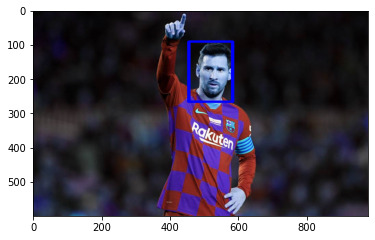

In [20]:
th = 0.6
img_rgb, img_gray = open_img(1)


template = open_template(4)
obtener_patron_th(img_rgb, img_gray, template,th)


Para la imagen 1 se puede reconocer con el recorte de las imagenes 3,4 y 5 con un threadhold de 0.6

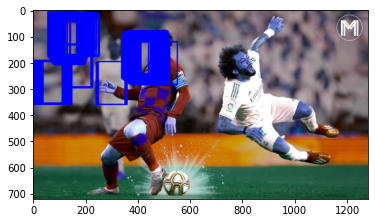

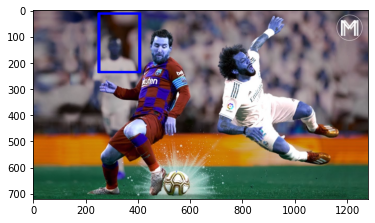

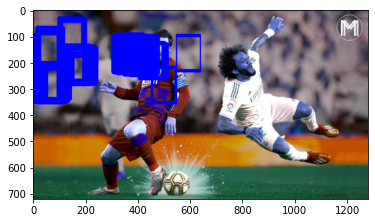

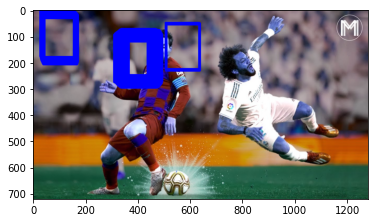

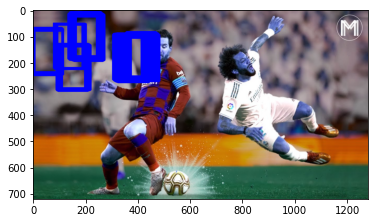

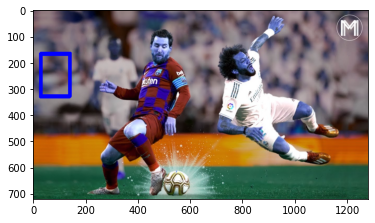

In [41]:
th = 0.3
img_rgb, img_gray = open_img(3)
img_gray = reducir_if(img_gray, 3, True) 

template = open_template(1)
obtener_patron_th(img_rgb, img_gray, template,th)
template = open_template(2)
obtener_patron_th(img_rgb, img_gray, template,th)
template = open_template(3)
obtener_patron_th(img_rgb, img_gray, template,th)
template = open_template(4)
obtener_patron_th(img_rgb, img_gray, template,th)
template = open_template(5)
obtener_patron_th(img_rgb, img_gray, template,th)
template = open_template(6)
obtener_patron_th(img_rgb, img_gray, template,th)

Se puede ver que no es bueno para reconocer los patrones de la imagen 3 para ningun recorte

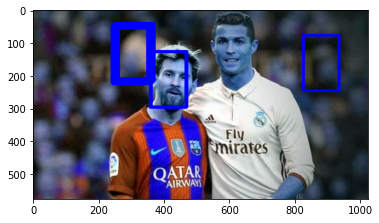

In [38]:
th = 0.5
img_rgb, img_gray = open_img(2)


template = open_template(5)
obtener_patron_th(img_rgb, img_gray, template,th)

Para la imagen 2 se puede reconocer con el recorte de la imagen 5 con un threadhold de 0.5. Fue el mejor resultado conseguido


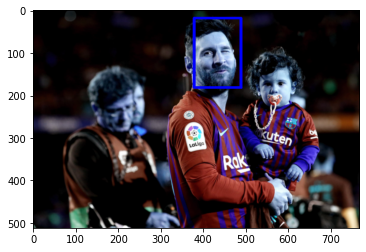

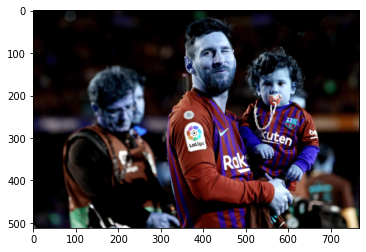

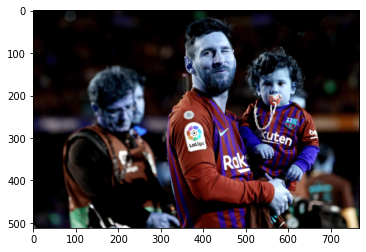

In [60]:
th = 0.67
img_rgb, img_gray = open_img(4)
img_gray = reducir_if(img_gray, 4)   
img_rgb = reducir_if(img_rgb, 4)   


template = open_template(1)
obtener_patron_th(img_rgb, img_gray, template,th)

template = open_template(5)
obtener_patron_th(img_rgb, img_gray, template,th)
template = open_template(6)
obtener_patron_th(img_rgb, img_gray, template,th)

Para la imagen 4 se puede reconocer con el recorte de la imagen 1 con un threadhold de 0.67. Fue el mejor resultado conseguido

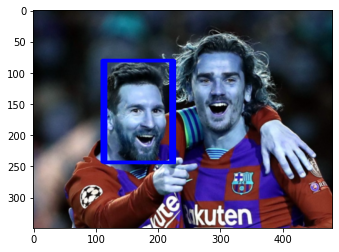

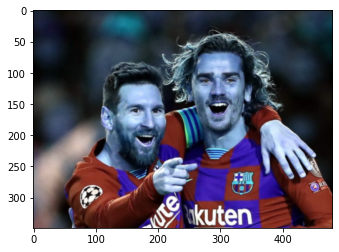

In [73]:
th = 0.6
img_rgb, img_gray = open_img(5)
img_gray = reducir_if(img_gray, 5)   
img_rgb = reducir_if(img_rgb, 5)   


template = open_template(1)
obtener_patron_th(img_rgb, img_gray, template,th)
template = open_template(2)
obtener_patron_th(img_rgb, img_gray, template,th)

Para la imagen 5 se puede reconocer con el recorte de la imagen 1 con un threadhold de 0.6. Fue el mejor resultado conseguido

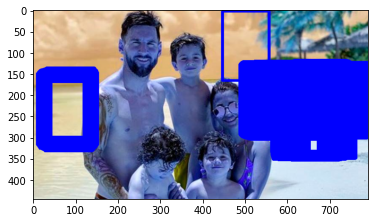

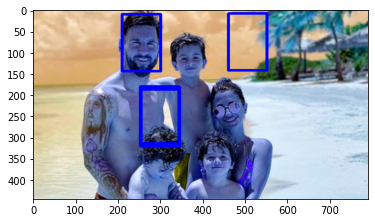

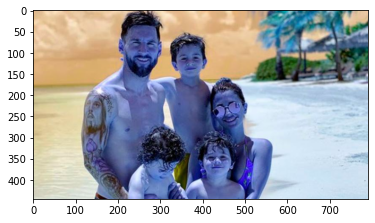

In [95]:
th = 0.39
img_rgb, img_gray = open_img(6)


template = open_template(1)
obtener_patron_th(img_rgb, img_gray, template,th)


template = open_template(3)
obtener_patron_th(img_rgb, img_gray, template,th)

template = open_template(5)
obtener_patron_th(img_rgb, img_gray, template,th)

Para la imagen 6 se puede reconocer con el recorte de la imagen 3 con un threadhold de 0.39. Fue el mejor resultado conseguido